<a href="https://colab.research.google.com/github/Raposones/Inteligencia-Artificial-2022.2/blob/master/An%C3%A1lise_MegaWind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados - MegaWind - Reparo de pás eólicas

> Autor: Raphael Carvalho Garcia <br>
Email: raphaelgarcia0607@gmail.com<br>
Github: https://github.com/Raposones

Este material é o projeto para entrega no bootcamp Geração Tech Unimed-BH - Ciência de Dados, da plataforma DIO - Digital Innovation One. Os dados fornecidos são apenas exemplos para a realização do projeto.

# Importando bibliotecas, lendo arquivos e resolvendo problemas

In [ ]:
#Importando bibliotecas e arquivos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#Usando um estilo diferente para matplot
plt.style.use('bmh')

#encoding é 'latin' pois a codificação padrão utf-8 não aceita acentos
df = pd.read_csv("REPARO DE PÁS ENERPLAN.csv", encoding='latin', sep=';')
df.head()

,Wind Park,WTG ID,Blade SN,Blade Model,Section,Image URL,Type,Location(m),Length(mm),Width(mm)
0,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,"13,82",6000,500
1,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Fungi,"17,8",2007,841
2,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,"23,41",120,10
3,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,"21,44",60,10
4,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,"25,03",500,10


In [ ]:
#Renomeando colunas para português
df = df.rename(columns={'Wind Park':'Parque Eólico', 'Blade SN':'SN da lâmina', 'Blade Model':'Modelo', 'Section': 'Seção', 'Image URL': 'Link da imagem', 
                   'Type':'Tipo', 'Location(m)':'Altura(m)', 'Length(mm)':'Comprimento(mm)', 'Width(mm)':'Largura(mm)'})
df.head()

,Parque Eólico,WTG ID,SN da lâmina,Modelo,Seção,Link da imagem,Tipo,Altura(m),Comprimento(mm),Largura(mm)
0,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,"13,82",6000,500
1,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Fungi,"17,8",2007,841
2,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,"23,41",120,10
3,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,"21,44",60,10
4,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,"25,03",500,10


In [ ]:
#Checando tipos em cada coluna
df.dtypes

Parque Eólico      object
WTG ID             object
SN da lâmina        int64
Modelo             object
Seção              object
Link da imagem     object
Tipo               object
Altura(m)          object
Comprimento(mm)     int64
Largura(mm)         int64
dtype: object

Ao checar os tipos em cada coluna, podemos fazer algumas modificações:
- SN da lâmina está como inteiro, mas podemos modificar para string, visto que o número serial de algo é único e não desejamos realizar nenhum cálculo com ele;
- Altura (em metros) está como string, é necessário usá-la como float para realizar cálculos (como altura média, achar a menor altura, etc) O fato de possuir vírgula o faz do tipo float, e não integer.

In [ ]:
#Função para trocar vírgulas por pontos. Por convenção, números flutuantes utilizam ponto.
#Ao tentar converter de string para float, dá erro se o valor possuir vírgula, portanto será necessário trocá-los para ponto.
df['Altura(m)'] = df['Altura(m)'].str.replace(',', '.')

#Modificando tipos das colunas
df = df.astype({'SN da lâmina':object, 'Altura(m)':float})
df['Altura(m)'] = df['Altura(m)']
df.dtypes

Parque Eólico       object
WTG ID              object
SN da lâmina        object
Modelo              object
Seção               object
Link da imagem      object
Tipo                object
Altura(m)          float64
Comprimento(mm)      int64
Largura(mm)          int64
dtype: object

Ao tentar, por exemplo, analisar a altura média de cada tipo de defeito, temos o seguinte:

In [ ]:
df.groupby('Tipo')['Altura(m)'].mean().round(2)

Tipo
Crack in the bonding line        42.88
Crack in the laminate            34.89
Crack in the laminate             3.73
Delamination                     48.56
Drain Hole Obstructed            55.23
Fungi                            14.80
LEP tape- Damaged                37.02
Seleant cracked                  58.90
Top Coat - Eorosion in the LE    53.72
Top Coat - Peeling               28.31
Top Coat - Peeling               13.02
Top Coat - Pitting               33.43
Top Coat - Scratch               30.09
Top Coat - Superficial Crack     36.60
Name: Altura(m), dtype: float64

Temos duplicatas! É possível perceber o erro ao pegar a lista de valores únicos de Tipo:

In [ ]:
list(df['Tipo'].unique())

['Top Coat - Peeling',
 'Fungi',
 'Top Coat - Pitting',
 'Crack in the laminate',
 'Top Coat - Peeling ',
 'Crack in the bonding line',
 'Top Coat - Eorosion in the LE',
 'Drain Hole Obstructed',
 'LEP tape- Damaged',
 'Top Coat - Superficial Crack',
 'Delamination ',
 'Crack in the laminate ',
 'Top Coat - Scratch',
 'Seleant cracked']

Ao analisar a lista, podemos perceber que algumas string possuem um espaço em branco no final, deixando os valores como únicos. Para solucionar isso, devemos limpar esses espaços, tornando todos os valores iguais.

In [ ]:
#Usando 'rstrip' para limpar os espaços na direita
df['Tipo'] = df['Tipo'].str.rstrip()

#Verificando a média novamente, podemos perceber que agora não há duplicatas!
df.groupby('Tipo')['Altura(m)'].mean().round(2)

Tipo
Crack in the bonding line        42.88
Crack in the laminate            32.94
Delamination                     48.56
Drain Hole Obstructed            55.23
Fungi                            14.80
LEP tape- Damaged                37.02
Seleant cracked                  58.90
Top Coat - Eorosion in the LE    53.72
Top Coat - Peeling               27.87
Top Coat - Pitting               33.43
Top Coat - Scratch               30.09
Top Coat - Superficial Crack     36.60
Name: Altura(m), dtype: float64



# Análises
 



##  Quantidade de parques, lâminas e problemas diferentes:

In [ ]:
#Número de parques únicos
num_parques = df['Parque Eólico'].nunique()

#Lista com nome dos parques
parques = list(df['Parque Eólico'].unique())

#Número de lâminas únicas (por SN)
num_laminas = df['SN da lâmina'].nunique()

#Número de tipos de problemas presentes
num_tipos = df['Tipo'].nunique()

#Lista com o nome de cada problema
tipos = list(df['Tipo'].unique())

#Mostrando resultados
print(f'Nº parques: {num_parques}\nParques: {parques}')
print('//'.center(20, '-'))
print(f'Nº de problemas diferentes: {num_tipos}\nTipos de problemas: {tipos}')
print('//'.center(20, '-'))
print(f'Nº lâminas com problemas: {num_laminas}')


Nº parques: 1
Parques: ['COMPLEXO EÓLICO PONTAL']
---------//---------
Nº de problemas diferentes: 12
Tipos de problemas: ['Top Coat - Peeling', 'Fungi', 'Top Coat - Pitting', 'Crack in the laminate', 'Crack in the bonding line', 'Top Coat - Eorosion in the LE', 'Drain Hole Obstructed', 'LEP tape- Damaged', 'Top Coat - Superficial Crack', 'Delamination', 'Top Coat - Scratch', 'Seleant cracked']
---------//---------
Nº lâminas com problemas: 18


Poderíamos analisar cada parque, mas como há apenas um, não será necessário. 

Com esta anáise, concluímos que há um total de 18 lâminas diferentes, e um total de 12 problemas diferentes para cada lâmina.

## Quantidade de problemas em lâminas por modelo

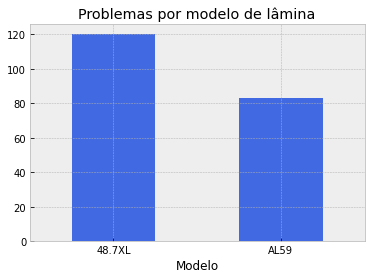

In [ ]:
df.groupby('Modelo')['Tipo'].size().plot.bar(title='Problemas por modelo de lâmina', color='royalblue')
plt.xticks(rotation='0');

O modelo 48.7XL apresenta mais problemas do que o modelo AL59.

## Comparação de problemas por quantidade

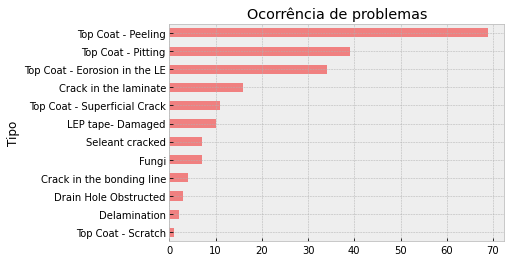

In [ ]:
#Problema x quantidade, ordenado de maior para menor
df_problemas = df.groupby('Tipo')['Tipo'].size().sort_values()
df_problemas.plot.barh(title="Ocorrência de problemas", color='lightcoral');

Comparando os problemas, percebemos que o problema **Top Coat - Peeling (camada superior descascando) é o mais frequente**, enquanto **Top Coat - Scratch (camada superior coom arranhôes) é o que menos acontece**.

## Analisando a altura, comprimento e largura dos problemas


### -> Altura, comprimento e largura média

In [ ]:
#Usando o metodo describe, retornar uma lista com as medias (feitas no dataset com colunas de números reais)
medias = list(df.describe().mean().round(2))

#Ordem da lista medias: altura média -> comprimento médio -> largura média
alt_med = medias[0]
comp_med = medias[1]
larg_med = medias[2]

print(f'Altura média da localização dos problemas: {alt_med} metros;')
print(f'Comprimento médio dos problemas: {comp_med} milímetros;')
print(f'Largura média dos problemas: {larg_med} milímetros;')

Altura média da localização dos problemas: 53.23 metros;
Comprimento médio dos problemas: 1374.59 milímetros;
Largura média dos problemas: 912.3 milímetros;


### -> Comparação entre problema mais alto e mais baixo, e maior e menor

In [ ]:
#Problema localizado na maior altura
df[df['Altura(m)']==df['Altura(m)'].max()]


,Parque Eólico,WTG ID,SN da lâmina,Modelo,Seção,Link da imagem,Tipo,Altura(m),Comprimento(mm),Largura(mm)
161,COMPLEXO EÓLICO PONTAL,P2A-05,1608,AL59,SS,https://winddataimgwindeuprd.blob.core.windows...,Seleant cracked,58.92,10,290
178,COMPLEXO EÓLICO PONTAL,PA2-04,1832,AL59,SS,https://winddataimgwindeuprd.blob.core.windows...,Seleant cracked,58.92,10,290


In [ ]:
#Problema localizado na menor altura
df[df['Altura(m)']==df['Altura(m)'].min()]

,Parque Eólico,WTG ID,SN da lâmina,Modelo,Seção,Link da imagem,Tipo,Altura(m),Comprimento(mm),Largura(mm)
22,COMPLEXO EÓLICO PONTAL,P2B-02,2364,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,1.94,500,500


Para efeitos de teste, consideramos que os problemas estejam em forma retangular. Assim, podemos calcular sua área no formato **area = comprimento x largura** e então descobrir a maior e menor área. Iremos adicionar a área em uma nova coluna do DataFrame original.

In [ ]:
#Adicionando coluna 'Área(mm)'
df['Area(mm)'] = df['Comprimento(mm)'] * df['Largura(mm)']
df.sample(10)

,Parque Eólico,WTG ID,SN da lâmina,Modelo,Seção,Link da imagem,Tipo,Altura(m),Comprimento(mm),Largura(mm),Area(mm)
33,COMPLEXO EÓLICO PONTAL,P2B-02,2364,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,31.03,740,70,51800
156,COMPLEXO EÓLICO PONTAL,P2A-05,1608,AL59,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,47.58,20,10,200
67,COMPLEXO EÓLICO PONTAL,P3B-05,1602,AL59,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Eorosion in the LE,57.63,1000,30,30000
183,COMPLEXO EÓLICO PONTAL,P2A-01,1618,AL59,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,40.59,1000,10,10000
189,COMPLEXO EÓLICO PONTAL,P2A-01,1618,AL59,PS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Superficial Crack,39.31,50,50,2500
6,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,22.76,6000,242,1452000
201,COMPLEXO EÓLICO PONTAL,P2A-01,1627,AL59,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Eorosion in the LE,57.81,1500,50,75000
69,COMPLEXO EÓLICO PONTAL,P3B-05,1602,AL59,LE,https://winddataimgwindeuprd.blob.core.windows...,Fungi,15.69,4000,1000,4000000
20,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,SS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,30.60,360,788,283680
101,COMPLEXO EÓLICO PONTAL,P2B-06,2688,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Superficial Crack,11.41,75,10,750


In [ ]:
#Maior problema (maior área)
df[df['Area(mm)']==df['Area(mm)'].max()]

,Parque Eólico,WTG ID,SN da lâmina,Modelo,Seção,Link da imagem,Tipo,Altura(m),Comprimento(mm),Largura(mm),Area(mm)
12,COMPLEXO EÓLICO PONTAL,P2B-02,2035,48.7XL,PS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,17.51,6000,2966,17796000


In [ ]:
#Menor problema (menor área)
df[df['Area(mm)']==df['Area(mm)'].min()]

,Parque Eólico,WTG ID,SN da lâmina,Modelo,Seção,Link da imagem,Tipo,Altura(m),Comprimento(mm),Largura(mm),Area(mm)
47,COMPLEXO EÓLICO PONTAL,P2B-02,2364,48.7XL,PS,https://winddataimgwindeuprd.blob.core.windows...,Drain Hole Obstructed,48.37,10,10,100
52,COMPLEXO EÓLICO PONTAL,P2B-02,2364,48.7XL,SS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Peeling,42.89,10,10,100
84,COMPLEXO EÓLICO PONTAL,P3B-05,1615,AL59,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,31.57,10,10,100
123,COMPLEXO EÓLICO PONTAL,P2B-06,2396,48.7XL,PS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,6.07,10,10,100
150,COMPLEXO EÓLICO PONTAL,P2B-07,2940,48.7XL,LE,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,29.60,10,10,100
199,COMPLEXO EÓLICO PONTAL,P2A-01,1626,AL59,SS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Pitting,24.71,10,10,100
202,COMPLEXO EÓLICO PONTAL,P2A-01,1627,AL59,PS,https://winddataimgwindeuprd.blob.core.windows...,Top Coat - Superficial Crack,41.54,10,10,100


In [ ]:
#Média de área dos problemas
area_media = df['Area(mm)'].mean().round(2)
print(f'Área média de problemas por lâmina: {area_media}mm')
print(f'Área média de problemas por lâmina, em metros: {area_media // 1000}m')


Área média de problemas por lâmina: 603792.05mm
Área média de problemas por lâmina, em metros: 603.0m


A área media dos problemas por lâmina é de 603792.05 milímetros, ou 603 metros.

### -> Area média por problema

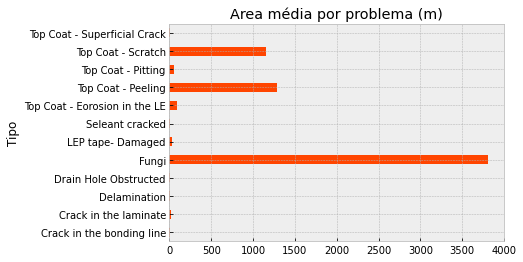

In [ ]:
#Para representat melhor os dados, vamos representar a área de milímetros para metros (dividindo por 1000)
#E, então, inserir a area por metro em uma nova coluna no dataset
df['Area(m)'] = df['Area(mm)'] // 1000
df.groupby('Tipo')['Area(m)'].mean().round(2).plot.barh(title='Area média por problema (m)', color='orangered')

Podemos notar que o problema com tamanho médio maior é o de fungos, indicando que este problema geralmente tem uma área maior do que as outras. Os problemas de descascamento e arranhões seguem como os maiores atrás.

Em contrapartida, a maioria dos outros problemas são pouco ou não visíveis no gráfico, indicando que, no geral, estes problemas são menores.

## Comparando lâminas e seus problemas

### -> Problemas x lâminas

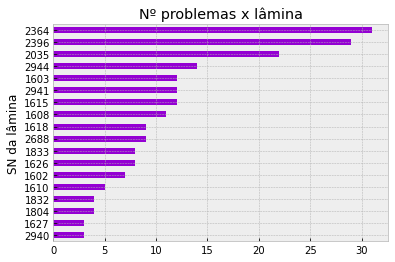

In [ ]:
df.groupby('SN da lâmina')['Tipo'].size().sort_values().plot.barh(title='Nº problemas x lâmina', color='darkviolet');

A làmina 2364 apresentou o maior número de problemas, enquanto a lâmina 2940 apresentou o menor número.

In [ ]:
media = int(df.groupby('SN da lâmina')['Tipo'].size().mean())
print(f'Média de problemas por lâmina: {media}')

Média de problemas por lâmina: 11


Podemos concluir que cada lâmina tem, em média, 11 problemas.

### -> Gráfico de comparação de cada problema, para cada lâmina

In [ ]:
#Transformando em um DataSet onde analisamos, para cada lâmina (por SN), cada problema envolvido nesta lâmina
df_blades = df[['SN da lâmina', "Tipo"]]
df_blades = df_blades.groupby([pd.Categorical(df['SN da lâmina']), 'Tipo']).size().reset_index(name='Nº ocorrencias')

#Renomeando coluna de volta para SN de lâminas
df_blades = df_blades.rename(columns={'level_0':'SN da lâmina'})
df_blades.head(25)

,SN da lâmina,Tipo,Nº ocorrencias
0,1602,Crack in the bonding line,0
1,1602,Crack in the laminate,0
2,1602,Delamination,0
3,1602,Drain Hole Obstructed,1
4,1602,Fungi,1
5,1602,LEP tape- Damaged,0
6,1602,Seleant cracked,0
7,1602,Top Coat - Eorosion in the LE,3
8,1602,Top Coat - Peeling,0
9,1602,Top Coat - Pitting,1


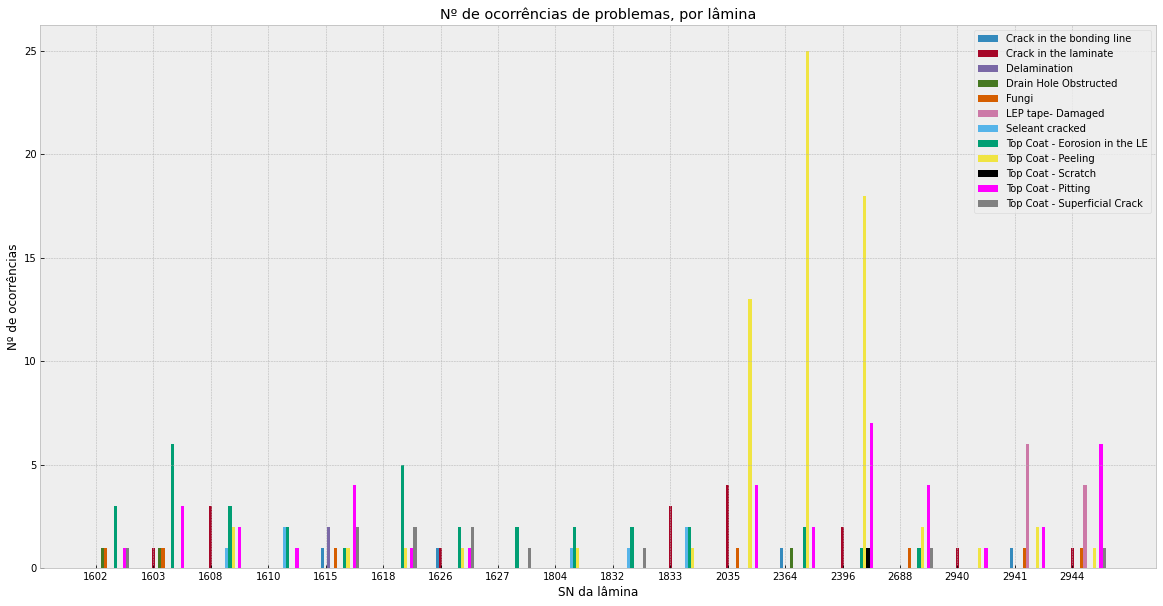

In [ ]:


#Lista de lâminas
blades = list(df_blades['SN da lâmina'].unique())

#Lista de ocorrências em cada problema
line_crack = list(df_blades.loc[df_blades['Tipo'] == 'Crack in the bonding line']['Nº ocorrencias'])
lam_crack = list(df_blades.loc[df_blades['Tipo'] == 'Crack in the laminate']['Nº ocorrencias'])
delam = list(df_blades.loc[df_blades['Tipo'] == 'Delamination']['Nº ocorrencias'])
obstruct = list(df_blades.loc[df_blades['Tipo'] == 'Drain Hole Obstructed']['Nº ocorrencias'])
fungi = list(df_blades.loc[df_blades['Tipo'] == 'Fungi']['Nº ocorrencias'])
LEP_damage = list(df_blades.loc[df_blades['Tipo'] == 'LEP tape- Damaged']['Nº ocorrencias'])
seal_crack = list(df_blades.loc[df_blades['Tipo'] == 'Seleant cracked']['Nº ocorrencias'])
tc_erosion = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Eorosion in the LE']['Nº ocorrencias'])
tc_peel = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Peeling']['Nº ocorrencias'])
tc_scratch = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Scratch']['Nº ocorrencias'])
tc_pitt = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Pitting']['Nº ocorrencias'])
tc_superf = list(df_blades.loc[df_blades['Tipo'] == 'Top Coat - Superficial Crack']['Nº ocorrencias'])

problems = df_blades['Tipo'].unique()

#Criação do gráfico
#Gerar figura
fig = plt.figure(figsize=(20,10))

#Número de conjunto de barras (cada conjunto é uma lâmina)
N = len(blades)

#Barras no eixo x
ind = np.arange(N)

#Largura de cada barra
#Esse método acha sempre o melhor width possível (não entendi como)
width = np.min(np.diff(range(len(blades))))/len(blades)

#Criando barras
plt.bar(ind, line_crack, width, label='Crack in the bonding line',)
plt.bar(ind + width, lam_crack, width, label='Crack in the laminate')
plt.bar(ind + width*2, delam, width, label='Delamination')
plt.bar(ind + width*3, obstruct, width, label='Drain Hole Obstructed')
plt.bar(ind + width*4, fungi, width, label='Fungi')
plt.bar(ind + width*5, LEP_damage, width, label='LEP tape- Damaged')
plt.bar(ind + width*6, seal_crack, width, label='Seleant cracked')
plt.bar(ind + width*7, tc_erosion, width, label='Top Coat - Eorosion in the LE')
plt.bar(ind + width*8, tc_peel, width, label='Top Coat - Peeling')
plt.bar(ind + width*9, tc_scratch, width, label='Top Coat - Scratch', color='black')
plt.bar(ind + width*10, tc_pitt, width, label='Top Coat - Pitting', color='magenta')
plt.bar(ind + width*11, tc_superf, width, label='Top Coat - Superficial Crack', color='grey')

#Nomeando eixo x e y
plt.xlabel('SN da lâmina')
plt.ylabel('Nº de ocorrências')
plt.title('Nº de ocorrências de problemas, por lâmina')

#Posição dos nomes do eixo X
plt.xticks(ind + width, blades)

#Mostrando legendas no melhor lugar
plt.legend(loc='best')
plt.show()

> **Nota**: esse gráfico é apenas por puro aprendizado. Algumas barras podem estar mal colocadas, e os nomes no eixo X não estão perfeitamente alinhados. Além disso, a etsratégia utilizada para criar as barras pode não ser a melhor.

Embora seja um gráfico complicado para analisar em detalhes, em uma visão geral podemos notar algumas coisas:

- o problema de camadas descascadas (Top Coat Peeling - linha amarela), em alguns casos, acontece em maior quantidade quando comparado aos outros problemas;

- é possível vizualizar as cores verde-claro e rosa em grande parte das lâminas, indicando que os problemas de erosão e corrosão em cavidades aparecem com mais frequência entre uma lâmina e outra;

- o descascamento da camada superior é o único problema que ocorre mais de 10 vezes. De fato, a maioria dos problemas acontecem bem menos: em média 1-2 vezes por lâmina;

- alguns problemas aparecem muitas poucas vezes. Por exemplo, a linha preta (que indica arranhôes na camada superior) aparece uma única vez, na lâmina 2396. Isto indica que não é um problema comum.


## Bonus

Algumas análises que provavelmente seriam pouco ou não usadas, apenas a fins de estudo.

### -> Altura média onde cada problema ocorre

In [ ]:
df.groupby('Tipo')['Altura(m)'].mean().round(2)

Tipo
Crack in the bonding line        42.88
Crack in the laminate            32.94
Delamination                     48.56
Drain Hole Obstructed            55.23
Fungi                            14.80
LEP tape- Damaged                37.02
Seleant cracked                  58.90
Top Coat - Eorosion in the LE    53.72
Top Coat - Peeling               27.87
Top Coat - Pitting               33.43
Top Coat - Scratch               30.09
Top Coat - Superficial Crack     36.60
Name: Altura(m), dtype: float64

O problema de obstrução no ralo acontece em alturas menores, enquanto problemas por fungos acontecem nas menores alturas. Como já vimos anteriormente, a altura média dos problemas é de 53 metros.

### -> Altura total escalada para resolver problemas

In [ ]:
alt_total = df['Altura(m)'].sum()
print(f'Foram escalados um total de {int(alt_total)} metros.')

#Altura do Everest é constante
EVEREST = 8849
res = int(EVEREST - alt_total)

#Mostrando resultados, considerando se a altura total é maior ou menor do que a do Everest
if res < 0:
  print(f'Isso é equivalente a escalar o Everest inteiro, e mais {-(res)} metros!')
else:
  print(f'Com mais {res} metros, você escalaria o equivalente ao Everest!')

Foram escalados um total de 7333 metros.
Com mais 1515 metros, você escalaria o equivalente ao Everest!


É notável que os problemas estão em grandes alturas, e por razões óbvias resolvidos por equipes de diversos profissionais. Porém, se uma só pessoa resolvesse todos os problemas deste parque, o total escalado por esta pessoa seria quase equivalente ao Everest, a maior montanha do mundo!

# Considerações finais

Com algumas poucas linhas de código, é possível analisar, de modo geral, vários aspectos em um dataset, planilha ou carta de várias linhas. Neste caso, analisamos uma planilha de Excel (convertida para formato CSV por questões práticas) de 201 linhas e 10 colunas, analisando em poucas linhas o que demoraria horas, ou até dias para concluir!

<br>

Como meu primeiro projeto de Ciência de Dados, algumas informações podem não estar inteiramente corretas ou completas, e também os métodos utilizados para criar os gráficos, ou até mesmo os gráficos, podem não ser os de melhor eficiência. Portanto, caro leitor, caso tenha alguma opinião, dica ou sugestão, sinta-se livre para me contatar!

Obrigado por acompanhar o projeto até aqui!
 🙂